##### Mitchell Scott (mtscot4)
##### Phys 731R: Random Matrix Theory
##### Prof. Ilya Nemenman
##### Spring 2024

# Homework #2
## 1. Let's verify how important the Gaussian assumption is for generating random matrix ensembles. Generate a symmetric square $N\times N$ matrix with only values of $\pm a$ admissible. Make $N$ at least a hundred if not more. Which values of $a$ should you choose so that the variance of off-diagonal elements is $\sigma^2/N$? Can this matrix be rotationally invariant? Does it matter which values we put on the diagonal? Numerically diagonalize the matrix, and bin the spectrum into 100 bins. Repeat the procedure $M\gg 1$ times, and add the spectra to the same bins. Finally, plot the histrogram of the spectra, overlaid with the GOE prediction for the same variance. How close is the agreement? Explain also why, for this problem, it's not enough to histogram eigenvalues of just one large matrix, but we may need an ensemble averaging. Do we end up needing it based on your results?

In [2]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

np.random.seed(23)

In [124]:
N = 1000
M = 100  # Trials
a = np.array((0.01,1,10))  # pm a value
evals1 = np.zeros((3,M * N))
for k in range(len(a)):
    for i in range(M):
        A = np.matlib.randn(N,N)
        A = 0.5 * A + 0.5 * A.T     # Symmetric
        A = a[k] * np.sign(A)       # Scale to pm a
        evals1[k, (N*i): (N*i) + N] = np.linalg.eigvalsh(A)

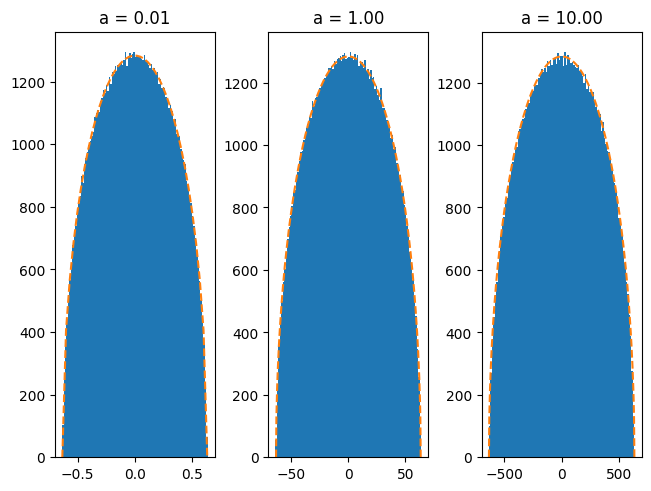

In [142]:
x0 = np.linspace(-.635,.635,40)
y0 = (6350. / np.pi) * np.sqrt(.635 ** 2  - x0 ** 2) 

x1 = np.linspace(-63.5,63.5,400)
y1 = (63.5 / np.pi) * np.sqrt(63.5 ** 2  - x1 ** 2) 

x2 = np.linspace(-635,635,400)
y2 = (6.35 / np.pi) * np.sqrt(635 ** 2  - x2 ** 2) 

fig, ax = plt.subplots(1, 3,constrained_layout = True)
for i in range(3):
    ax[i].hist(evals1[i,:],100)
    ax[i].set_title('a = %2.2f' %a[i])
    

#y = np.sqrt(4 * a ** 2  - x ** 2)/ (2 * np.pi * a)
ax[0].plot(x0, y0, '--')
ax[1].plot(x1, y1, '--')
ax[2].plot(x2, y2, '--')
#ax.xlabel('Value')


plt.show() 

We see that each element has equal probability of being $+a$ and $-a$ (as they were pulled from the symmetric Gaussian). This means for this matrix, we have $\mu=0, \sigma=a$. This matrix also should be rotationally invariant, especially as $N\to\infty$. We could consider this problem as a scaled version of the spin-1 Ising model, and the values are the spins in a lattice. We know that far away, the Ising model is rotationally invariant, so this should be as well!

I have attempted to show that for $a=0.01,1.0,10.0$, we still see the semi-circle law we would expect for large symmetric matrices. It is not sufficient to have the eigenvalues of one really large matrix as the eigenvalues influence each other, so they are not independent. The book puts it as "the eigenvalues turn out to be strongly corelated and can be thought of as 'particles' interacting through pariwise repulsion." Since there is an interaction with the eigenvalues, adding more and more i.e. makng $N\to\infty$, then there would be more possible interactions and repulsions, and their influence on each other cannot be ignored. This is why we run many independent trials, where in each small matrix case the eigenvalues are interacting to a small amount and we are observing many independnent samples.

The agreement with the semi-circle law for GOE matrices is uncanny. It seems because we used many samplings from relatively small matrices, we were able to see the self-averaging behavior to get the discrete bands of eigenvalues to a more continuous distribution. I do not think this was needed for our results.

## 2. Let's verify now how important is that the matrix is dense. Generate a $N\times N$ GOE matrix, as per textbook instructions. Now choose the value $0\le p \le 1$ and set each element of the matrix (and its symmetric one) to 0 with this probability. Diagonalize the matrix and bin its spectrum. Repeat many times to get the histrogram of eigenvalues for this ensemble. Plot the histogram, overlaid with the GOE analysis result; analytically estimate which variance of the GOE ensemble should you be comparing to as a function of $p$. Repeat for a few values of $p$, so that $pN$ goes from a few (sparse matrix) to $\sim N$ (dense matrix). Do you see an agreement with the GOE result? Explain. Explain also why, for this problem, it's not enough to histogram eigenvalues of just one large matrix, but we may need an ensemble averaging. Do we end up needing it based on your results? For which $p$?

In [51]:
p = np.array((-7, -1.15035,-0.6745,-0.31863,0.0,0.31863,0.6745,1.15035, 7)) # Z-scores of probabilities of 0/8, 1/8, 2/8,...
N = 100  # Size of Matrix
M = 1000 # Number of Trials

evals2 = np.zeros((9,N * M))

for k in range(len(p)):
    for i in range(M):
        B = np.matlib.randn(N,N)      # N(0,1) entries
        B = 0.5 * B + 0.5 * B.T       # Symmetry
        B = np.where(B > p[k], 0, B)  # delete elements below prob. threshold
    
        # Note B is still symmetric after deletions
        evals2[k, (N*i): (N*i) + N] = np.linalg.eigvalsh(B)


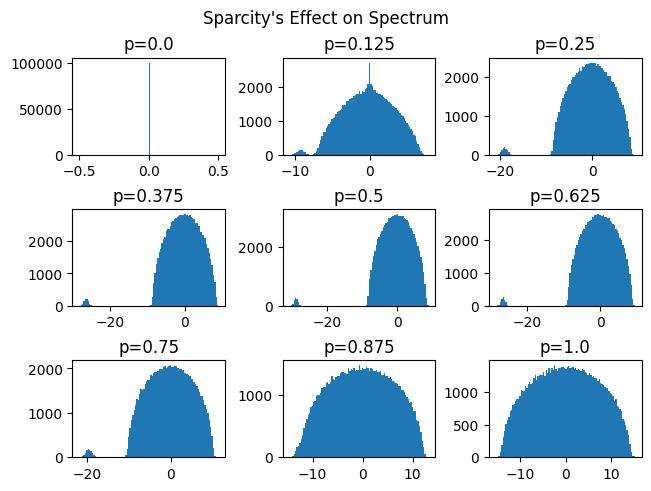

In [52]:
fig, ax = plt.subplots(3, 3,constrained_layout = True)
for i in range(3):
    ax[0,i].hist(evals2[i,:],100)
    ax[1,i].hist(evals2[i+3,:],100)
    ax[2,i].hist(evals2[i+6,:],100)

 
# plot 2 subplots
ax[0,0].set_title('p=0.0')
ax[0,1].set_title('p=0.125')
ax[0,2].set_title('p=0.25')
ax[1,0].set_title('p=0.375')
ax[1,1].set_title('p=0.5')
ax[1,2].set_title('p=0.625')
ax[2,0].set_title('p=0.75')
ax[2,1].set_title('p=0.875')
ax[2,2].set_title('p=1.0')
 
fig.suptitle("Sparcity's Effect on Spectrum")
plt.show()

We see many interesting results from this experiment on the sparcity of a random matrix. First observe that when $p$ is very low, i.e. most elements are 0, we see that most eigenvalues are simply zero, so we get a singular matrix. As $p$ increases, we get a more dense matrix. For example, when $p=0.125$, we still see the spike of 0 eigenvalues, but it is smeared. This is also the first time that we see another bump around $x=-10$. As $p$ cotinues to increase, we still see the presence of two bumps, one small and negative, the other prominant and familiar. Finally as $p\to1$, we recover the orginal semicircle law that would be expected.

## 3. We saw that the Stieltjes transform of a large Wishart matrix ($q=N/T$) should be given by \begin{align} g(z) =\frac{z+q-1 \pm \sqrt{(z+q-1)^2 - 4qz}}{2qz},\end{align} where the sign of the square-root should be chosen such that $g(z)\to 1/z$ when $z\to\pm\infty$.

#### a.) Show that the zeros of the argument of the square-root are given by $\lambda_{\pm} = (1\pm \sqrt{q})^2$.

First we need to show that $(z-\lambda_-)(z-\lambda_+) = (z+q-1)^2 - 4qz$, where $\lambda_\pm = (1\pm \sqrt{q})^2$

\begin{align}
(z-\lambda_-)(z-\lambda_+) &= \left(z-(1- \sqrt{q})^2\right)\left(z-(1+ \sqrt{q})^2\right)\\
&= z^2 - (1-\sqrt{q})^2z - (1+\sqrt{q})^2z + \left[(1+ \sqrt{q})^2)(1-\sqrt{q})^2)\right]\\
&= z^2 - z +2\sqrt{q}z -qz -z -2\sqrt{q}z - qz + 1 + 2\sqrt{q} + q -2\sqrt{q} - 4q - 2q^{3/2}+q+2q^{3/2}+q^2\\
&= z^2 - 2z-2qz+1+2q-4q+q^2 \\
&= z^2-2z+2qz+1-2q+q^2 - 4qz\\
&= (z+q-1)^2 - 4qz
\end{align}

This proves the equality of the roots and original form.

#### b.) The function \begin{align} g(z) =\frac{z+q-1 - \sqrt{(z-\lambda_-)}\sqrt{(z-\lambda_+)}}{2qz}\end{align} should have the right properties. Show that it behaves nicely as $g(z)\to1/z$ when $z\to\pm \infty$. By expanding in powers of $1/z$ up to $1/z^3$ compute the first and second moments of the Wishart distribution.

The limit as $z\to+\infty$ is straightforward. Since $z\gg \lambda_-, \lambda_+$, then the difference $z-\lambda_\ast \approx z$
\begin{align}
\lim_{z\to\infty} g(z) &= \lim_{z\to\infty} \frac{z+q-1 - \sqrt{(z-\lambda_-)}\sqrt{(z-\lambda_+)}}{2qz}\\
&= \lim_{z\to\infty} \frac{q-1}{2qz} + \frac{1}{2q} - \frac{\sqrt{z}\sqrt{z}}{2qz}\\
&= \lim_{z\to\infty} \frac{q-1}{2qz}\\
&\approx \frac{1}{z}.
\end{align}

The other limit is slightly more complicated, but we can use the fact that $-z\ll -1$ to  rewrite it as $\sqrt{-1(\lambda_\ast - z)} = i\sqrt{\lambda_\ast - z}$. Since there are two of these then we are able to recover $-1$.
\begin{align}
\lim_{z\to-\infty} g(z) &= \lim_{z\to-\infty} \frac{z+q-1 - \sqrt{(z-\lambda_-)}\sqrt{(z-\lambda_+)}}{2qz}\\
&= \lim_{z\to-\infty} \frac{q-1}{2qz} + \frac{1}{2q} - \frac{i^2\sqrt{z}\sqrt{z}}{2qz}\\
&= \lim_{z\to-\infty} \frac{q-1}{2qz}\\
&\approx \frac{1}{z}.
\end{align}

#### c.) Optional

#### d.) The non-zero eigenvalues should be distributed according to the Mar$\check{\text{c}}$enko - Pastur distribution: \begin{align} \rho_q(x) = \frac{\sqrt{(x-\lambda_-)(\lambda_+-x)}}{2\pi qx}.\end{align} Show that this distribution is correctly normalized when $q<1$ but not when $q>1$. Use what you know about the pole at $z=0$ in that case to correctly write down $\rho_q(x)$ when $q>1$.

The case where $q=1$ is dealt with below. The reason that $q<1$ is properly normalized is because there is a zero probability of a zero eigenvalue, so all of the eigenvalues are contained in the distribution. When $q\geq 1$, then there is a nonzero probability of a zero eigenvalue, so the distribution might be missing those values so the total is sub-normalized or less than 1.  However, when we use the fact that this is a removable singularity, we can rewrite the probability distribution by completing the square to see 
\begin{align}
\rho_q(x) = \frac{\sqrt{4q - (x-1-q)^2}}{2\pi x}, \quad x \in (\lambda_-, \lambda_+)
\end{align}

#### e.) In the case $q=1$, Eq.(4.48) has an integrable singularity at $x=0$. Write a simpler formula for $\rho_1(x)$. Let $u$ be the square of an eigenvalue from a Wigner matrix of unit variane, i.e. $u=y^2$ where $y$ is distributed according to the semi-circular law $\rho(y) = \sqrt{4-y^2}/(2\pi)$. Show that $u$ is distributed according to $\rho_1(x)$. This result is \it{a priori} not obvious as a Wigner matrix is symmetric while the square matrix $\mathbf{H}$ is generally not; nevertheless, moments of high-dimensional matrices of the form $\mathbf{HH}^\top$ are the same whether the matrix $\mathbf{H}$ is symmetric or not.

When $q=1$, that means $N=T$, so we have a square matrix with i.i.d. Gaussian entries (exactly the set-up for a Wigner Matrix). Quantatively, we have $\lambda_- = (1-\sqrt{1})^2 =0, \lambda_+ = (1+\sqrt{1})^2 = 4$, so we can rewrite the equation as:

\begin{align}
\rho_1(x) &= \frac{\sqrt{(x-\lambda_-)(\lambda_+-x)}}{2\pi x}\\
&= \frac{\sqrt{x(4-x)}}{2\pi x}\\
&= \frac{\sqrt{x}\sqrt{4-x}}{2\pi x}\\
&= \frac{\sqrt{4-x}}{2\pi \sqrt{x}},\\ 
\end{align}
where $x\in(0,4]$, since otherwise we would get an undefined or imaginary answer.

Nex we consider the mapping $u=y^2\implies \sqrt{u} = y, \frac{1}{2\sqrt{u}} \text{d}u = \text{d}y$, and plugging into the equation
\begin{align}
\rho(y) &= \frac{\sqrt{4-y^2}}{2\pi}\\
&= \frac{\sqrt{4-u}}{4\pi \sqrt{u}},
\end{align}

so with this mapping $x\to x^2$, we see the connection between Wigner's semi-circle law and the ''quarter-circle'' law of the Mar$\check{\text{c}}$henko-Pastur Law. This makes sense as we hope the more general Mar$\check{\text{c}}$henko-Pastur solution should be able to return the Wigner Law under the same problem set-up, which is what we see.

#### f.) Generate three matrices $\mathbf{E} = \mathbf{HH}^\top/T$ where the matrix $\mathbf{H}$ is an $N\times T$ matrix of i.i.d. Gaussian numbers of variance 1. Choose a large $N$ and the values of $T$ such that $q = N/T$ equals {1/2,1,2}. Plot the normalized histogram of the eigenvalues in the three cases vs the corresponding Mar$\check{\text{c}}$enko-Pastur distribution; don't show the peak at zero. In the case $q=2$, how many eigenvalues do you expect? How many do you get?

In [3]:
N = 1000
T = np.array((2000,1000, 500))
evals3 = np.zeros((N, 3))
evals3n0 = np.array((0,3))


for i in range(3):
    H = np.matlib.randn(N,T[i])
    E = (H @ H.T) / T[i]
    evals3[:,i] = np.linalg.eigvalsh(E)

 

In [94]:
eigs31 = evals3[abs(evals3[:,0]) >= 5e-15]
eigs32 = evals3[abs(evals3[:,1]) >= 5e-15]
eigs33 = evals3[abs(evals3[:,2]) >= 5e-15]

len(eigs33)

500

In [171]:
def mpdist(x, q):
    "Marchenko-Pastur distribution"
    def m0(a):
        "Element wise maximum of (a,0)"
        return np.maximum(a, np.zeros_like(a))
    qplus = (1 + q ** 0.5) **2
    qminus = (1 - q ** 0.5) **2
    return np.sqrt(m0(qplus  - x) *  m0(x - qminus)) / ( 2*np.pi*q*x)


In [163]:
x = np.linspace(0.01,3,300)
m0 = mpdist(x,0.5)
m1 = mpdist(x,1)
m2 = mpdist(x,2)

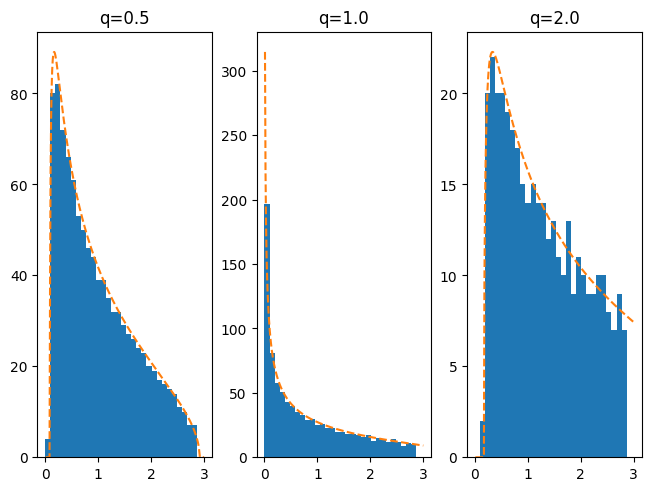

In [170]:
fig, ax = plt.subplots(1, 3,constrained_layout = True)

ax[0].hist(evals3[:,0],30,(5e-15,evals3[:,0].max()))
ax[1].hist(evals3[:,1],30,(5e-15,evals3[:,0].max()))
ax[2].hist(evals3[:,2], 30,(5e-15,evals3[:,0].max()))
ax[0].plot(x,99*m0, '--')
ax[1].plot(x,99*m1, '--')
ax[2].plot(x,99*m2, '--')
ax[0].set_title('q=0.5')
ax[1].set_title('q=1.0')
ax[2].set_title('q=2.0')
plt.show()

We see great agreement between the distribution of eigenvalues for $q<,=,>1$ and the Mar$\check{\text{c}}$henko - Pastur distribution. There are some numerical considerations around $x=0$ that needed to be considered, but overall great agreement. While $N=1000$ for all cases, we should expect $N$ eigenvalues for all of them, which we do observe; however, when considering non-zero eigenvalues we observe that for $q\leq 1$, we do see $N$ non-zero eigenvalues, but when $q>1$, we only observe 500 non-zero eigenvalues. This make sense that we would see exactly 500/1000 eigenvalues being nonzero. Since $q=2$, we know that $1-\frac{1}{q} =1 - \frac{1}{2} = 0.5$ eigenvalues are zero. 

## 4. In class, I discussed a problem with spectrum of a matrix $H=[H_{11}, H_{12}; H^*_{21}, H_{22}]$. First, derive the formula I showed in class for the eigenvalue gap. Second, assume that all $H_{11}-H_{22}$ and $H_{12}$ are Gaussian. Let's keep all entries real. Derive the scaling of the probability distribution of observing a gap near zero. If you want to explore this further, now allow $H_{12}$ to be complex (the full H matrix should still stay Hermitian). What  is the scaling of the pdf of the gap near zero? Finally, if you want to explore this even more, think about what should we assume about the matrix H and the distribution of its entries to get eigenvalue attraction, rather than eigenvalue repulsion?

Let's first recall what was discussed in class. Let $E_c = \frac{1}{T}H_cH_c^\top$, where $H_c$ is an $N\times T$ rectangular matrix with independent columns. Each column is a radnom Gaussian vector with covariance matrix $C$. Given the standard formula for eigenvalues spacings from the probability distribution, we see
\begin{align}
P(M) &= \frac{1}{z} e^{-\left(\frac{N}{2}\text{tr}V(M)\right)}\\
&= \frac{1}{z}e^{-\left(\frac{N}{2}\sum_{i=1}^NV(\lambda_i)\right)}
\end{align}

For a partitioned matrix,
\begin{align}
H = \begin{pmatrix}H_{11} & 0 \\0 & H_{22}\end{pmatrix},
\end{align}
we can see that 
\begin{align}
\lambda_2-\lambda_1 = \sqrt{(H_{22} - H_{11})^2 + H_{12}^2},
\end{align}
where $ H_{22}-H_{11} \in \mathbb{R}^n$, or a Poisson distribution.

## 5. Wigner was interestedin the distribution of energy levels spaings in heavy nuclei, which he modeled as the eigenvalues of a real symmetric random matrix (time reversal symmetryimposes that the Hamiltonian be real). Let $x = |\lambda_{k+1} - \lambda_k|$ for $k$ in the bulk. In principle we can obtain the probability density of $x$ by using Eq. (5.22) and integrating out all other variables. In practice, it is very difficult to go much beyond $N=2$. Since the $N=2$ result (properly normalized) has the correct small $x$ and large $x$ behavior, Wigner surmized that it must be a good approximation at any $N$.

#### a.) For $N=2$ GOE matrix, i.e. $v(\lambda) = \lambda^2/2\sigma^2$, write the normalized law of $\lambda_1$ and $\lambda_2$, its two eigenvalues. 

For the $N=2$ GOE, the potential function is $\mathbf{V}(\lambda) = \frac{\lambda^2}{2\sigma^2}$. This means through a straightforward application of Eq. 5.22, we derive
\begin{align}
    \mathbb{P}(\{\lambda_1,\lambda_2\}) &\propto \left|\lambda_1 - \lambda_2\right| \exp{\left(-\frac{\lambda_1^2+\lambda_2^2}{2\sigma^2}\right)}
\end{align}


#### b.) Change variables to $\lambda_{\pm} = \lambda_2 \pm \lambda_1$, integrate out $\lambda_+$ and write the unnormalized law of $x = |\lambda_-|$.

Consider the transformation:
\begin{align}
\lambda_1 := \frac{\lambda_+ - \lambda_-}{2}, \qquad \lambda_2 := \frac{\lambda_+ + \lambda_-}{2}
\end{align}
Then we can rewrite $P(\{\lambda_1,\lambda_2\})$ as
\begin{align}
P(\{\lambda_1,\lambda_2\}) &\propto \left|\lambda_1 - \lambda_2\right| \exp{\left(-\frac{\lambda_1^2+\lambda_2^2}{2\sigma^2}\right)}\\
&= |\lambda_-| \exp{\left(-\frac{\left(\frac{\lambda_+ - \lambda_-}{2}\right)^2+\left(\frac{\lambda_+ + \lambda_-}{2}\right)^2}{2\sigma^2}\right)}\\
&= |\lambda_-| \exp{\frac{-\lambda_+^2 + 2\lambda_+\lambda_- - \lambda_-^2 - \lambda_+^2 - 2\lambda_+\lambda_- - \lambda_-^2}{8\sigma^2}}\\
&= |\lambda_-| \exp{\frac{-\lambda_+^2  - \lambda_-^2}{4\sigma^2}}\\
&=: P(\{\lambda_+,\lambda_-\}) 
\end{align}

Now we have a form where both $\lambda_+,\lambda_-$, are in the exponent, so it is easy to integrate w.r.t $\lambda_+$.
\begin{align}
\int_{\mathbb{R}} P(\{\lambda_+,\lambda_-\}) \text{d}\lambda_+ &= \int_{\mathbb{R}} |\lambda_-| \exp{\frac{-\lambda_+^2  - \lambda_-^2}{4\sigma^2}} \text{d}\lambda_+\\
&= \int_{\mathbb{R}} |\lambda_-| \exp{\frac{-\lambda_+^2}{4\sigma^2}} \exp{\frac{  - \lambda_-^2}{4\sigma^2}} \text{d}\lambda_+\\
&= |\lambda_-|\exp{\frac{  - \lambda_-^2}{4\sigma^2}} \int_{\mathbb{R}} \exp{\frac{-\lambda_+^2}{4\sigma^2}} \text{d}\lambda_+\\
&= 2\sqrt{\pi\sigma}|\lambda_-|\exp{\frac{  - \lambda_-^2}{4\sigma^2}}
\end{align}

Finally, converting this as a probability function of $x = |\lambda_-|$, we arrive at
\begin{align}
P(x) &\propto 2\sqrt{\pi\sigma}x\exp{\frac{  - x^2}{4\sigma^2}}
\end{align}

#### c.) Normalize your law and choose $\sigma$ such that $\mathbb{E}[x]=1$; you should find \begin{align} P(x) = \frac{\pi}{2}x\exp\left[-\frac{\pi}{4}x^2\right].\end{align}

To normalize this, we need $\int_{\mathbf{R}} P(x) \text{d}x = 1$, so we introduce a normalization constant,  $c$. Using the aid of my favorite Computer Algebra System, Mathematica,
\begin{align}
\int_{\mathbf{R}} P(x) \text{d}x &= c\int_{\mathbb{R}} 2\sqrt{\pi\sigma}x\exp{\left[\frac{  - x^2}{4\sigma^2}\right]}\\
&= 4\sqrt{\pi} \sigma^{5/2}c\\
&= 1\\
c &= \frac{1}{4\sqrt{\pi} \sigma^{5/2}}
\end{align}

This means the normalized $P(x)$ is
\begin{align}
P(x) &= \frac{1}{2\sigma^2}x\exp{\left[\frac{  - x^2}{4\sigma^2}\right]}.
\end{align}
Lastly, we need to make sure that $\mathbb{E}[x] = \int_{\mathbb{R}} x P(x) \text{d}x = 1$, so again by Mathematica, we compute
\begin{align}
\mathbb{E}[x] &= \int_{\mathbb{R}}\frac{1}{4\sigma^2}x^2\exp{\left[\frac{  - x^2}{4\sigma^2}\right]}\\
&= \frac{\sqrt{\pi}}{\sqrt{\frac{1}{\sigma^2}}}\\
&= 1.
\end{align}
This is only the case if we set $\sigma = \frac{1}{\sqrt{\pi}}$, so the final normalized and unit-variance probability law is
\begin{align} 
P(x) = \frac{\pi}{2}x\exp\left[-\frac{\pi}{4}x^2\right],
\end{align}
exactly what we should have found.

#### d.) Using Eq. (5.26) redo the computation for GUE $(\beta = 2)$ You should find \begin{align} P(x) = \frac{32}{\pi^2}x^2\exp\left[-\frac{4}{\pi}x^2\right].\end{align}

With $N=2, \beta = 2, V(\lambda) = \frac{\lambda^2}{2\sigma^2}$, we see Eq. (5.26) becomes

\begin{align}
P(\{\lambda_1,\lambda_2\}) &\propto  \exp{\left[-2\left(\frac{\lambda_1^2}{2\sigma^2} + \frac{\lambda_1^2}{2\sigma^2} - \log|\lambda_1 - \lambda_2|\right)\right]}.
\end{align}

Using the same change of variables as above, we see 
\begin{align}
P(\{\lambda_+,\lambda_-\}) &\propto  \exp{\left[-2\left(\frac{\lambda_+^2}{4\sigma^2} + \frac{\lambda_-^2}{4\sigma^2} - \log|\lambda_-|\right)\right]}\\
&= \exp{\left[\left(\frac{-\lambda_+^2}{2\sigma^2} + \frac{-\lambda_-^2}{2\sigma^2}\right)\right]e^{2\log|\lambda_-|}}\\
&= |\lambda_-|^2\exp{\left[\frac{-\lambda_+^2-\lambda_-^2}{2\sigma^2} \right]}.
\end{align}

Next, we integrate w.r.t $\lambda_+$, to see
\begin{align}
\int_{\mathbb{R}}P(\{\lambda_+,\lambda_-\}) \text{d}\lambda_+ &\propto \int_{\mathbb{R}}|\lambda_-|^2\exp{\left[\frac{-\lambda_+^2-\lambda_-^2}{2\sigma^2} \right]} \text{d}\lambda_+\\
&= |\lambda_-|^2\exp{\left[\frac{-\lambda_-^2}{2\sigma^2} \right]} \int_{\mathbb{R}}\exp{\left[\frac{-\lambda_+^2}{2\sigma^2} \right]}\text{d}\lambda_+\\
&= \sigma\sqrt{2\pi}|\lambda_-|^2\exp{\left[\frac{-\lambda_-^2}{2\sigma^2} \right]}.
\end{align}

Lastly, we need to normalize this probability distribution by introducing the normalization constant $z$.
\begin{align}
\int_{\mathbb{R}} P(x) \text{d}x &= \int_{\mathbb{R}}z\sigma\sqrt{2\pi}x^2\exp{\left[\frac{-x^2}{2\sigma^2} \right]}\text{d}x\\
&= z2\pi\sigma^4\\
z &= \frac{1}{2\pi\sigma^4}.
\end{align}
This means our normalized probability distribution is
\begin{align}
P(x) = \frac{1}{\sqrt{2\pi}\sigma^3}x^2\exp{\left[\frac{-x^2}{2\sigma^2} \right]}.
\end{align}

Lastly, we see that
\begin{align}
\mathbb{E}[x] &= \int_{\mathbb{R}}\frac{1}{\sqrt{2\pi}\sigma^3}x^2\exp{\left[\frac{-x^2}{2\sigma^2} \right]}\text{d}x\\
&= 2\sigma\sqrt{\frac{2}{\pi}}\\
&= 1\\
\sigma &= \sqrt{\frac{\pi}{8}}.
\end{align}

Under the restrictions of being a unit-variance probability distribution, we have shown that the $N=2$ GUE case (where $\beta=2$) that
\begin{align}
P(x) = \frac{32}{\pi^2}x^2\exp\left[-\frac{4}{\pi}x^2\right],
\end{align}

which matches the answer that was provided.